## Árvore Binária de Busca

In [1]:
# Import of auxiliar files for show image of us tree
from aux_plot_tree import graphviz, image_tree, delete_file
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
class No:
  def __init__(self, valor):
    self.valor = valor
    self.esquerda = None
    self.direita = None
  
  def mostra_no(self):
    print(self.valor)

In [3]:
class ArvoreBinariaBusca:
  def __init__(self):
    self.raiz = None
    self.ligacoes = []
    self.ordem = []

  def inserir(self, valor):
    novo = No(valor) # Queremos inserir um novo valor na minha árvore, 
                     # porém esse valor tem que ser um Nó, portanto temos
                     # que instanciar uma nova classe Nó com o valor que queremos inserir.

    # Se a árvore estiver vazia
    if self.raiz == None:
      self.raiz = novo # Ou seja, "self.raiz" está apontando para o primeiro nó que foi criado, quando a arvore estava vazia.
                       # A partir de agora não irá mais acontecer de entrarmos nessa condição, porque a raíz já está definida. 
                       # Sempre que utilizarmos "self.raiz" estamos na realidade pegando o Nó raiz, que tem algo na esquerda e direita tb.
                       # Conforme foi definido na class lá de cima.

    else:
      atual = self.raiz # Então "atual" está pegando o Nó do topo, que está guardado dentro de "self.raiz"
      
      # Laço para percorrer toda a árvore e acharmos o local correto de realizarmos essa inserção.
      while (True):
        pai = atual # Que começa no topo da nossa árvore, lá em raiz.
        
        # Inserção do nó pela Esquerda
        
        # Se o valor que queremos inserir na árvore for menor que o valor que está guardado dentro do Nodo atual que estamos verificando
        # então a inserção será veito na esquerda do nó.
        if valor < atual.valor:
          atual = atual.esquerda 
          if atual == None:  # Achamos o local de realizarmos a inserção
            pai.esquerda = novo 
            self.ligacoes.append(str(pai.valor) + '->' + str(novo.valor))
            return
          
        # Inserção do nó pela Direita
        else:
          atual = atual.direita
          
          if atual == None:
            pai.direita = novo
            self.ligacoes.append(str(pai.valor) + '->' + str(novo.valor))
            return
          
  # Esquerda, Raiz, Direita
  def em_ordem(self, no):
    if no != None:
      self.em_ordem(no.esquerda)
      self.ordem.append(no.valor)
      self.em_ordem(no.direita)

  def mostrar_em_ordem(self):
    self.saida = '['
    for item in self.ordem:
      self.saida += str(item) + str(', ')
    self.saida = self.saida[:-1]
    self.saida = self.saida[:-1]
    self.saida += ']'
    print(self.saida)

  def show_tree(self):
    elementos = self.ligacoes

    # Chame a função passando a lista de elementos
    conteudo = graphviz(elementos)

    # Crie e salve o arquivo no formato: .dot
    with open("aux_show_tree.dot", "w") as arquivo_dot:
      arquivo_dot.write(conteudo)

    image_tree("aux_show_tree.dot", "EntrevistaDeCodigoBR.png")

    delete_file("aux_show_tree.dot")

    imagem = mpimg.imread("EntrevistaDeCodigoBR.png")
    plt.imshow(imagem)
    plt.axis('off')
    plt.show()

    delete_file("EntrevistaDeCodigoBR.png")

In [4]:
arvore = ArvoreBinariaBusca()
arvore.inserir(10)
arvore.inserir(5)
arvore.inserir(1)
arvore.inserir(6)
arvore.inserir(19)
arvore.inserir(17)
arvore.inserir(21)

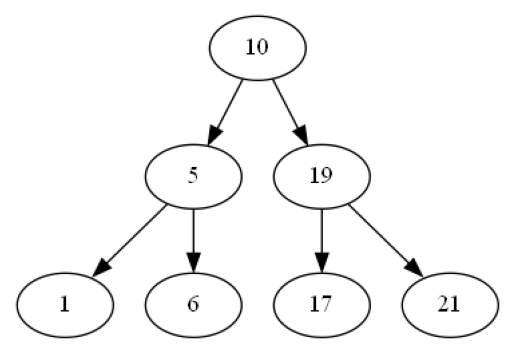

In [5]:
arvore.show_tree()

In [6]:
arvore.em_ordem(arvore.raiz)
arvore.mostrar_em_ordem()

[1, 5, 6, 10, 17, 19, 21]


## Árvore Binária - Travessia em Pós-Ordem

Recursivamente faz a travessia na subárvore esquerda, faz uma travessia recursiva na subárvore direita e por fim visita a raiz.

Esquerda -> Direita -> Raiz 

In [8]:
# Import of auxiliar files for show image of us tree
from aux_plot_tree import graphviz, image_tree, delete_file
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class No:
  def __init__(self, valor):
    self.valor = valor
    self.esquerda = None
    self.direita = None
  
  def mostra_no(self):
    print(self.valor)

class ArvoreBinariaBusca:
  def __init__(self):
    self.raiz = None
    self.ligacoes = []
    self.ordem = []

  def inserir(self, valor):
    novo = No(valor) # Queremos inserir um novo valor na minha árvore, 
                     # porém esse valor tem que ser um Nó, portanto temos
                     # que instanciar uma nova classe Nó com o valor que queremos inserir.

    # Se a árvore estiver vazia
    if self.raiz == None:
      self.raiz = novo # Ou seja, "self.raiz" está apontando para o primeiro nó que foi criado, quando a arvore estava vazia.
                       # A partir de agora não irá mais acontecer de entrarmos nessa condição, porque a raíz já está definida. 
                       # Sempre que utilizarmos "self.raiz" estamos na realidade pegando o Nó raiz, que tem algo na esquerda e direita tb.
                       # Conforme foi definido na class lá de cima.

    else:
      atual = self.raiz # Então "atual" está pegando o Nó do topo, que está guardado dentro de "self.raiz"
      
      # Laço para percorrer toda a árvore e acharmos o local correto de realizarmos essa inserção.
      while (True):
        pai = atual # Que começa no topo da nossa árvore, lá em raiz.
        
        # Inserção do nó pela Esquerda
        
        # Se o valor que queremos inserir na árvore for menor que o valor que está guardado dentro do Nodo atual que estamos verificando
        # então a inserção será veito na esquerda do nó.
        if valor < atual.valor:
          atual = atual.esquerda 
          if atual == None:  # Achamos o local de realizarmos a inserção
            pai.esquerda = novo 
            self.ligacoes.append(str(pai.valor) + '->' + str(novo.valor))
            return
          
        # Inserção do nó pela Direita
        else:
          atual = atual.direita
          
          if atual == None:
            pai.direita = novo
            self.ligacoes.append(str(pai.valor) + '->' + str(novo.valor))
            return
          
  # Esquerda, Raiz, Direita
  def em_ordem(self, no):
    if no != None:
      self.em_ordem(no.esquerda)
      self.ordem.append(no.valor)
      self.em_ordem(no.direita)

  def mostrar_em_ordem(self):
    self.saida = '['
    for item in self.ordem:
      self.saida += str(item) + str(', ')
    self.saida = self.saida[:-1]
    self.saida = self.saida[:-1]
    self.saida += ']'
    print(self.saida)

  def show_tree(self):
    elementos = self.ligacoes

    # Chame a função passando a lista de elementos
    conteudo = graphviz(elementos)

    # Crie e salve o arquivo no formato: .dot
    with open("aux_show_tree.dot", "w") as arquivo_dot:
      arquivo_dot.write(conteudo)

    image_tree("aux_show_tree.dot", "EntrevistaDeCodigoBR.png")

    delete_file("aux_show_tree.dot")

    imagem = mpimg.imread("EntrevistaDeCodigoBR.png")
    plt.imshow(imagem)
    plt.axis('off')
    plt.show()

    # delete_file("EntrevistaDeCodigoBR.png")


if '__name__' == '__main__'

  arvore = ArvoreBinariaBusca()
  arvore.inserir(10)
  arvore.inserir(5)
  arvore.inserir(1)
  arvore.inserir(6)
  arvore.inserir(19)
  arvore.inserir(17)
  arvore.inserir(21)

  arvore.ordem(arvore.raiz)

  arvore.show_tree()




TypeError: 'list' object is not callable